# navid ebadi
# 401222093
##### cpu = core i7 12650H @2.3 GHz
##### cores = 2
##### os = windows 10
##### implementation = python 3.8.2
##### unit of measure = ms

---Random 0.6876497268676758 seconds ---
---Random 1.4538648128509521 seconds ---
---Random 2.190788507461548 seconds ---
---Random 3.027009963989258 seconds ---
---Random 3.9426589012145996 seconds ---
---Random 4.708486080169678 seconds ---
---Random 5.696828126907349 seconds ---
---Random 6.477796316146851 seconds ---
---Random 7.311195611953735 seconds ---
---Random 8.228030920028687 seconds ---


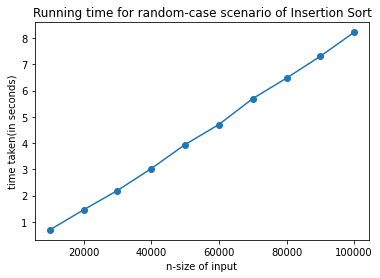

In [1]:
import random
import time
import matplotlib.pyplot as plt

def randList(seed, n):
  random.seed(seed)
  return [random.randint(0,1000) for x in range(n)]


def BlockSwap(A, p, q):
    for i in range(0, q-p):
        (A[p+i], A[q+i]) = (A[q+i], A[p+i])


def StableRBA(A, p, q, r):
    n0 = r-q
    n1 = q-p
    if n1 == 0:
        return r
    while n0 > 0:
        if n1 > n0:
            p = q-n0
            BlockSwap(A, p, q)
            n1 = n1-n0
            q = p
            p = p-n1
        else:
            BlockSwap(A, p, q)
            n0 = n0-n1
            p = q
            q = q+n1
    return p


def BinaryStableSort(A, p, r):
    if r-p > 1:
        q = (p+r)//2
        p = BinaryStableSort(A, p, q)
        r = BinaryStableSort(A, q, r)
        p = StableRBA(A, p, q, r)
    elif radixkey(A[p])==0 :
        return r
    return p


mask = 1
def radixkey(x):
    return x & mask

def inplaceRadixSort(x, n):
    global mask
    mask = 1
    for _ in range(32):
        BinaryStableSort(x, 0, n)
        mask <<= 1


A = randList(1401, 10000)



times_ran = []
num_r = []
for i in range (10000,100001,10000):

  num_r.append(i)

  data = randList(1401,i)
  size = len(data)
  start_time=time.time()
  inplaceRadixSort(data , len(data))
  t = time.time() - start_time
  print("---Random %s seconds ---" % (t))

  times_ran.append(t)

plt.plot(num_r, times_ran, marker='o', linestyle='-')
    
# Add labels and a title
plt.xlabel('n-size of input')
plt.ylabel('time taken(in seconds)')
plt.title('Running time for random-case scenario of Insertion Sort')
    
# Show the
plt.show()